In [147]:
import os
import pandas as pd
from lingpy import *
import numpy as np
from IPython.display import display

In [5]:
data = pd.read_excel("Downloads/Hw1-words.xlsx", sheet_name='Proto-words', skiprows=3)

In [10]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [11]:
data.columns

Index(['English', 'father', 'mother', 'one', 'eight', 'knee', 'nose', 'tongue',
       'dog', 'egg', 'smoke', 'snow', 'to burn', 'to bite', 'to sing',
       'to spit', 'dry'],
      dtype='object')

In [12]:
data.set_index('English', inplace=True)

In [13]:
data

,father,mother,one,eight,knee,nose,tongue,dog,egg,smoke,snow,to burn,to bite,to sing,to spit,dry
English,,,,,,,,,,,,,,,,
Erzya,*ićä,*ava,*ikte,*kakteksan,*polwe,*nere,*kele,*pene,*muna,*sawe,*lume,*korpe,*pure,*mura,*śil'ke,*kuśka
Finnish,*ićä,*emä,*ikte,*kakteksan,*polwe,*nenä,*kele,*pene,*muna,*sawe,*lume,*korpe,*pure,*laulu,*śil'ke,*kujwa
Hungarian,*ićä,*emä,*egy,*ńalɜ,*térd,*orr,*nyelv,*ämpɜ,*tojás,*pičɜ,*hó,*pilɜ,*harap,*énekel,*köp,*ϑasɜ
Mansi,*ićä,*emä,*ikte,*ńalɜ,*sāns,*nere,*kele,*ämpɜ,*muna,*pičɜ,*tūjt,*pilɜ,*pure,*mura,*śil'ke,*ϑasɜ
Mari (Meadow),*ićä,*ava,*ikte,*kakteksan,*polwe,*nere,*jylme,*pene,*muna,*šikš,*lume,*äŋɜ,*pure,*mura,*śil'ke,*kuśka
Saami (Northern),*ićä,*emä,*ikte,*kakteksan,*polwe,*nere,*kele,*pene,*muna,*sawe,*lume,*korpe,*pure,*laulu,*śil'ke,*kujwa


In [51]:
df

English,Erzya,Finnish,Hungarian,Mansi,Mari (Meadow),Saami (Northern)
father,*ićä,*ićä,*ićä,*ićä,*ićä,*ićä
mother,*ava,*emä,*emä,*emä,*ava,*emä
one,*ikte,*ikte,*egy,*ikte,*ikte,*ikte
eight,*kakteksan,*kakteksan,*ńalɜ,*ńalɜ,*kakteksan,*kakteksan
knee,*polwe,*polwe,*térd,*sāns,*polwe,*polwe
nose,*nere,*nenä,*orr,*nere,*nere,*nere
tongue,*kele,*kele,*nyelv,*kele,*jylme,*kele
dog,*pene,*pene,*ämpɜ,*ämpɜ,*pene,*pene
egg,*muna,*muna,*tojás,*muna,*muna,*muna
smoke,*sawe,*sawe,*pičɜ,*pičɜ,*šikš,*sawe


In [41]:
df = data.T
matrix_first = []
names = df.columns
for row in range(len(names)):
    rows = []
    for col in range(len(names)): 
        rows.append(len(set(df[names[row]])-set(df[names[col]])))
    matrix_first.append(rows)

In [118]:
main_matrix = pd.DataFrame(matrix_first, columns=list(df.columns), index=list(df.columns))
main_matrix 

,Erzya,Finnish,Hungarian,Mansi,Mari (Meadow),Saami (Northern)
Erzya,0,4,15,8,3,3
Finnish,4,0,14,9,7,1
Hungarian,15,14,0,9,15,14
Mansi,8,9,9,0,9,8
Mari (Meadow),3,7,15,9,0,6
Saami (Northern),3,1,14,8,6,0


In [200]:
sub_martix = main_matrix
tree_data = []
for sub_itr in range(len(main_matrix.index)-2):
    combine_col = []
    col_names=[]
    lowest_no = 0
    for sub_row in sub_martix.index:
        for sub_col in sub_martix.columns:
            small_value = sub_martix[[sub_col]].loc[[sub_row]].values
            if small_value==0 or small_value==lowest_no or small_value==np.nan:
                pass
            else:
                lowest_no = small_value
                combine_col = [sub_row, sub_col]
    print(f'Combine columns {combine_col}')
    tree_data.append(list(combine_col))
    sub_martix_columns = []
    if type(combine_col[0]) is list or type(combine_col[0]) is tuple:
        for ele in combine_col[0]:
            col_names.append(ele)
    else:
        col_names.append(combine_col[0])
    if type(combine_col[1]) is list or type(combine_col[1]) is tuple:
        for ele in combine_col[1]:
            col_names.append(ele)
    else:
        col_names.append(combine_col[1])
    sub_martix_columns = list(set(list(main_matrix.columns))-set(col_names))
    sub_martix_columns.append(tuple(col_names))
#     for sub_names in sub_martix.columns:
#         if sub_names in col_names:
#             if tuple(col_names) in sub_martix_columns:
#                 pass
#             else:
#                 sub_martix_columns.append(tuple(col_names))
#         else:
#             sub_martix_columns.append(sub_names)
#     print(sub_martix_columns)
    
    submatrix_first = []
    for row in sub_martix_columns:
        rows = []
        for col in sub_martix_columns:
            if list(row) == list(col):
                rows.append(0)
            else:
                if type(row) is tuple:
                    row =list(row)
                if type(col) is tuple:
                    col =list(col)
                try:
                    value = main_matrix[row].loc[col].values
                except:
                    value = main_matrix[row].loc[col]
                rows.append(np.mean(value))
        submatrix_first.append(rows)
    sub_martix = pd.DataFrame(submatrix_first, columns=sub_martix_columns, index=sub_martix_columns)
    display(sub_martix)

Combine columns ['Saami (Northern)', 'Mari (Meadow)']


,Erzya,Hungarian,Mansi,Finnish,"(Saami (Northern), Mari (Meadow))"
Erzya,0.0,15.0,8.0,4.0,3.0
Hungarian,15.0,0.0,9.0,14.0,14.5
Mansi,8.0,9.0,0.0,9.0,8.5
Finnish,4.0,14.0,9.0,0.0,4.0
"(Saami (Northern), Mari (Meadow))",3.0,14.5,8.5,4.0,0.0


Combine columns [('Saami (Northern)', 'Mari (Meadow)'), 'Finnish']


,Erzya,Hungarian,Mansi,"(Saami (Northern), Mari (Meadow), Finnish)"
Erzya,0.000000,15.000000,8.000000,3.333333
Hungarian,15.000000,0.000000,9.000000,14.333333
Mansi,8.000000,9.000000,0.000000,8.666667
"(Saami (Northern), Mari (Meadow), Finnish)",3.333333,14.333333,8.666667,0.000000


Combine columns [('Saami (Northern)', 'Mari (Meadow)', 'Finnish'), 'Mansi']


,Erzya,Hungarian,"(Saami (Northern), Mari (Meadow), Finnish, Mansi)"
Erzya,0.0,15.0,4.5
Hungarian,15.0,0.0,13.0
"(Saami (Northern), Mari (Meadow), Finnish, Mansi)",4.5,13.0,0.0


Combine columns [('Saami (Northern)', 'Mari (Meadow)', 'Finnish', 'Mansi'), 'Hungarian']


,Erzya,"(Saami (Northern), Mari (Meadow), Finnish, Mansi, Hungarian)"
Erzya,0.0,6.6
"(Saami (Northern), Mari (Meadow), Finnish, Mansi, Hungarian)",6.6,0.0


In [201]:
for sub_tree in range(len(tree_data)):
    for branch in range(len(tree_data[sub_tree])):
        if type(tree_data[sub_tree][branch]) is tuple:
            tree_data[sub_tree][branch]=list(tree_data[sub_tree][branch])
            

In [202]:
tree_data

[['Saami (Northern)', 'Mari (Meadow)'],
 [['Saami (Northern)', 'Mari (Meadow)'], 'Finnish'],
 [['Saami (Northern)', 'Mari (Meadow)', 'Finnish'], 'Mansi'],
 [['Saami (Northern)', 'Mari (Meadow)', 'Finnish', 'Mansi'], 'Hungarian']]

In [273]:
tree = np.array([[0.,1.,100,6],
       [6.,2., 200,7.],
       [7.,3.,300,8.],
                [8.,4., 400,9.],
       [9.,5.,500,10.]])

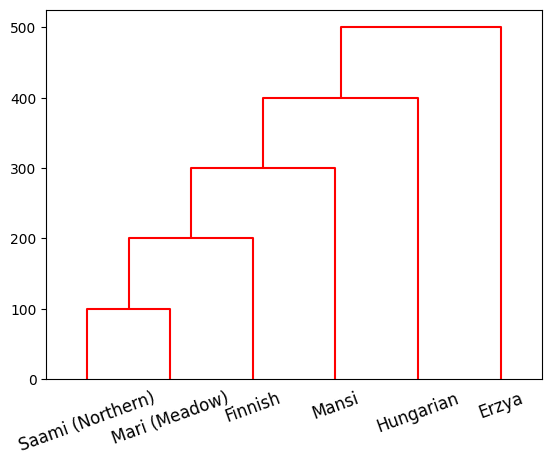

In [282]:
import numpy as np
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

plt.figure()
 
dn = hierarchy.dendrogram(
    tree, above_threshold_color="red", leaf_rotation=20, color_threshold=.9, labels=['Saami (Northern)', 'Mari (Meadow)', 'Finnish', 'Mansi', 'Hungarian', 'Erzya',])